In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import get_data_yahoo as yahoo
from pandas_datareader.data import YahooOptions as opt
from datetime import datetime as date
import mplfinance as mpl
from fbprophet import Prophet
from scipy import stats

In [3]:
start = date(2015,6,1)
end = date(2021,6,1)

In [58]:
gof = yahoo('gof')
wti = yahoo('ibm')
xlf = yahoo('carv')
spy = yahoo('spy')

In [5]:
for stock_df in (gof,wti,xlf):
    stock_df['Norm Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [6]:
gofc = gof[['Adj Close','Norm Return']]
wtic = wti[['Adj Close','Norm Return']]
xlfc = xlf[['Adj Close','Norm Return']]

In [7]:
for stock_df, allo in zip((gof,wti,xlf),[.38,.08,.54]):
    stock_df['Allocation'] = stock_df['Norm Return']*allo

In [8]:
for stock_df in (gof,wti,xlf):
    stock_df['Position'] = stock_df['Allocation']*2200

In [9]:
xlf.tail()

,High,Low,Open,Close,Volume,Adj Close,Norm Return,Allocation,Position
Date,,,,,,,,,
2021-05-25,8.28,7.75,8.01,7.90,354400,7.90,1.755556,0.9480,2085.600025
2021-05-26,8.43,7.91,7.98,8.00,578400,8.00,1.777778,0.9600,2112.000000
2021-05-27,8.35,7.95,7.95,8.25,220800,8.25,1.833333,0.9900,2178.000000
2021-05-28,8.69,8.16,8.21,8.56,184900,8.56,1.902222,1.0272,2259.840111
2021-06-01,9.19,8.60,8.67,9.14,274100,9.14,2.031111,1.0968,2412.960091


In [10]:
Portfolio = gof[['Position']],wti[['Position']],xlf[['Position']]

In [11]:
portfolio_val = pd.concat(Portfolio,axis=1)

In [12]:
portfolio_val.columns = ['GOF Pos','WTI Pos','XFL Pos']

In [13]:
portfolio_val['Total']=portfolio_val.sum(axis=1)

In [14]:
portfolio_val

,GOF Pos,WTI Pos,XFL Pos,Total
Date,,,,
2015-06-01,836.000000,176.000000,1188.000000,2200.000000
2015-06-02,836.790947,175.451861,1261.920055,2274.162864
2015-06-03,836.000000,175.731168,1195.920055,2207.651224
2015-06-04,836.000000,174.138432,1140.480045,2150.618477
2015-06-05,832.834488,173.124973,1164.239960,2170.199421
...,...,...,...,...
2021-05-25,1611.582243,192.794174,2085.600025,3889.976442
2021-05-26,1592.888354,192.244460,2112.000000,3897.132813
2021-05-27,1613.140017,192.834416,2178.000000,3983.974434


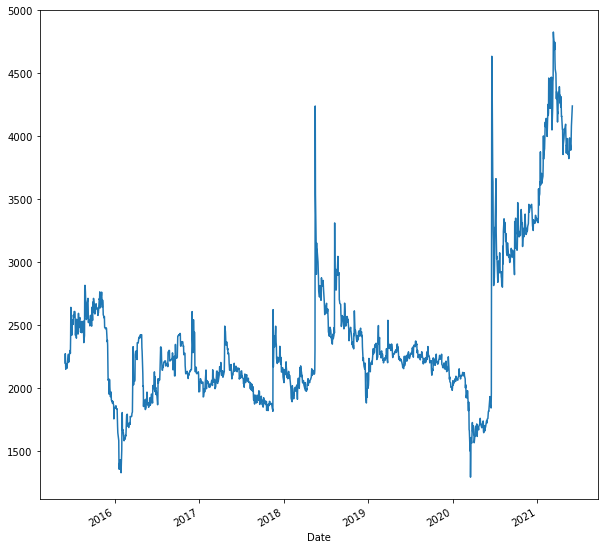

In [15]:
portfolio_val['Total'].plot(figsize=(10,10));

In [16]:
portfolio_val.loc['2021-06-01']['Total']

4241.240352240433

In [17]:
np.std(portfolio_val['Total'])

610.9259818609562

In [18]:
#Sharpe Ratio (S=[Protfolio Return(Rp)-Risk-free Return(Rf)]/Portfolio Standard Diviation(Sp))
#Note: Risk free is what you would recieve if you used an alt investment such as savings accounts or bonds
Rp = portfolio_val.loc['2015-06-01']['Total']
Rf = .0156
Sp = np.std(portfolio_val['Total'])

In [19]:
SR = (Rp-Rf)/Sp

In [20]:
SR

3.6010653750534147

In [21]:
#Annual average (daily instead of yearly)
k = np.sqrt(252)
#Annual Sharpe Ratio
ASR = k*SR

In [22]:
ASR

57.165140623661244

In [23]:
eur = yahoo('eurusd=x',start)
nzd = yahoo('nzdusd=x',start)
gbp = yahoo('gbpusd=x',start)
aud = yahoo('audusd=x',start)

In [24]:
eurac = eur[['Adj Close']]
nzdac = nzd[['Adj Close']]
gbpac = gbp[['Adj Close']]
audac = aud[['Adj Close']]

In [25]:
stocks = pd.concat([eurac,nzdac,gbpac,audac],axis=1)
stocks.columns = ['EUR','NZD','GBP','AUD']

In [27]:
stocks.pct_change(1).mean()

EUR    0.000065
NZD    0.000010
GBP   -0.000042
AUD    0.000009
dtype: float64

In [28]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.mean()

EUR    0.000053
NZD   -0.000011
GBP   -0.000061
AUD   -0.000011
dtype: float64

In [29]:
log_ret.cov()*252

,EUR,NZD,GBP,AUD
EUR,0.005841,0.003808,0.003840,0.003559
NZD,0.003808,0.010558,0.004599,0.007992
GBP,0.003840,0.004599,0.009312,0.004613
AUD,0.003559,0.007992,0.004613,0.009691


In [30]:
eur

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-31,1.098000,1.088890,1.095902,1.095794,0.0,1.095794
2015-06-01,1.116630,1.091941,1.092275,1.092299,0.0,1.092299
2015-06-02,1.128329,1.108679,1.114827,1.115001,0.0,1.115001
2015-06-03,1.137605,1.123260,1.126228,1.125784,0.0,1.125784
2015-06-04,1.128020,1.105180,1.121604,1.120787,0.0,1.120787
...,...,...,...,...,...,...
2021-06-15,1.213499,1.211035,1.212547,1.212709,0.0,1.212709
2021-06-16,1.200769,1.190703,1.199185,1.199559,0.0,1.199559
2021-06-17,1.192748,1.185115,1.191327,1.191341,0.0,1.191341


In [33]:
spy = yahoo('spy', start)

In [65]:
gof['Cumulative']=gof['Close']/gof['Close'].iloc[0]
spy['Cumulative']=spy['Close']/spy['Close'].iloc[0]

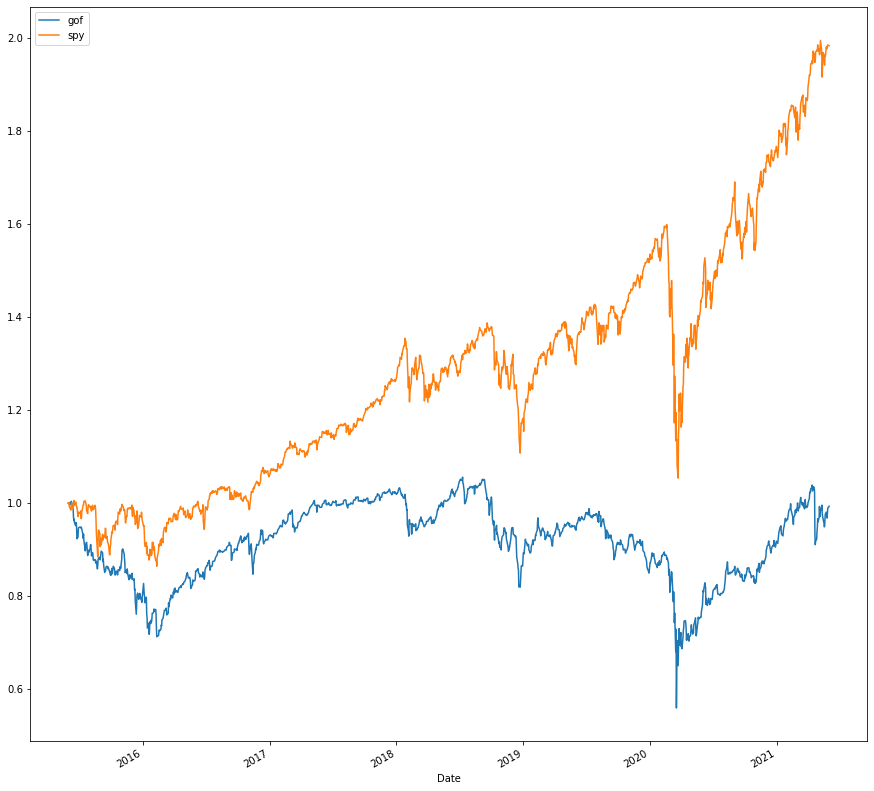

In [67]:
gof['Cumulative'].plot(label='gof',figsize=(15,15))
spy['Cumulative'].plot(label='spy')
plt.legend();

In [68]:
gof['Daily']=gof['Close'].pct_change(1)
spy['Daily']=spy['Close'].pct_change(1)

In [69]:
beta,alpha,r_value,p_value,std_err=stats.linregress(gof['Daily'].iloc[1:],
                                                   spy['Daily'].iloc[1:])

In [70]:
beta

0.3835007717016236

In [71]:
alpha

0.0004901590743494982